# 畳み込み積分

フーリエ変換を利用した畳み込み積分を行う。

## 理論

任意の性質の良い関数$f(x), g(x)$に対して、次の畳み込み積分$I(x)$を考える。

$$
I(x) = \int_{-\infty}^{\infty}dx' f(x')g(x-x')
$$

$I(x)$をフーリエ変換してやると、

$$
\begin{aligned}
\mathcal{F}[I](k) &= \int_{-\infty}^{\infty}dx I(x) e^{-ikx} \\
&= \int_{-\infty}^{\infty}dx \int_{-\infty}^{\infty}dx' f(x')g(x-x') e^{-ikx} \\
&= \int_{-\infty}^{\infty}dx' f(x') e^{-ikx'} \int_{-\infty}^{\infty}dx g(x-x') e^{-ik(x-x')} \\
&= \mathcal{F}[f](k) \cdot \mathcal{F}[g](k)
\end{aligned}
$$

したがって、

$$
\begin{aligned}
I(x) &= \mathcal{F}^{-1}[\mathcal{F}[I](k)](x) \\
&= \mathcal{F}^{-1}[\mathcal{F}[f](k) \cdot \mathcal{F}[g](k)](x)
\end{aligned}
$$

つまり、$I(x)$を得たければ$f(x)$と$g(x)$をフーリエ変換して、その積を逆フーリエ変換してやればよい。

## 具体例

次の関数を考える。

$$
\begin{aligned}
f(x) &= \frac{1}{x^2 + 1} \\
g(x) &= \theta(x) - \theta(x - 1) \\
I(x) &= \int_{-\infty}^{\infty}dx' f(x')g(x-x')
\end{aligned}
$$

ただし、$\theta(x)$はHeavisideの段差関数である。

この場合、畳み込み積分の解析的に解を求めることができて、

$$
\begin{aligned}
I(x) &= \int_{-\infty}^{\infty}dx' f(x')g(x-x') \\
&= \int_{x-1}^{x}dx' \frac{1}{x'^2 + 1} \\
&= \int_{\arctan{(x-1)}}^{\arctan{(x)}} \frac{d\phi}{\cos^2{\phi}} \frac{1}{\tan{\phi} ^2 + 1} \\
&= \int_{\arctan{(x-1)}}^{\arctan{(x)}} \frac{d\phi}{\cos^2{\phi}} \cos^2{\phi} \\
&= \int_{\arctan{(x-1)}}^{\arctan{(x)}} d\phi \\
&= \Big[\phi \Big]_{\arctan{(x-1)}}^{\arctan{(x)}} \\
&= \arctan{(x-1)} - \arctan{(x)}
\end{aligned}
$$

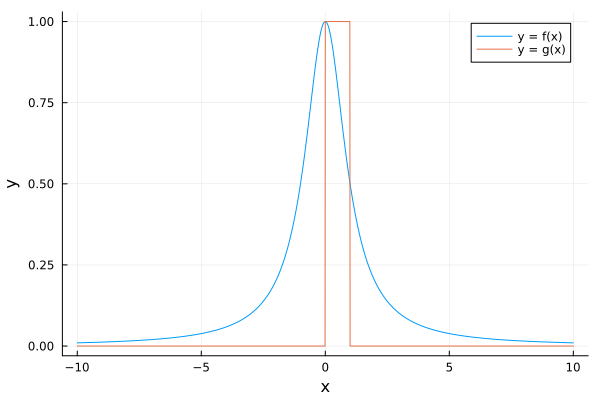

In [3]:
using FFTW
using Plots

# 関数の定義 ----------------------------------------------------
f(x) = 1 / (x^2 + 1)
g(x) = ifelse(x < 0.0, 0, 1.0) - ifelse(x < 1.0, 0, 1.0)
Δx = 0.01
x = range(-10, 10, step = Δx)

# 関数の描画 ----------------------------------------------------
plot(x, f.(x), label = "y = f(x)", xlabel = "x", ylabel = "y")
plot!(x, g.(x), label = "y = g(x)")

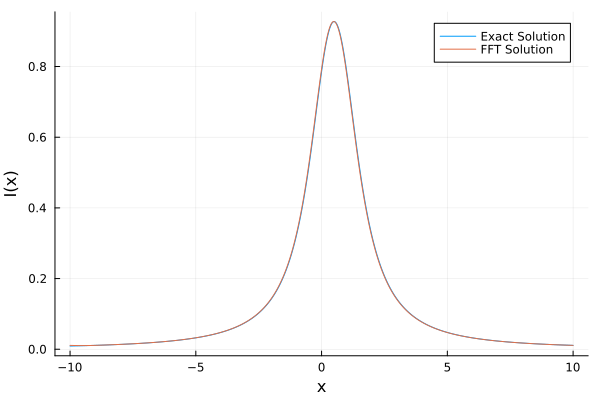

In [5]:
# 畳み込み積分の厳密解を計算 --------------------------------------
I_exact = @. atan(x) - atan(x - 1)

# フーリエ変換による畳み込み積分の計算 -----------------------------
conv(f, g, Δx) = Δx * ifft(fft(f) .* fft(g)) |> real |> fftshift
I_fft = conv(f.(x), g.(x), Δx)

# 畳み込み積分の結果を描画 ----------------------------------------
plot(x, I_exact, label = "Exact Solution", xlabel = "x", ylabel = "I(x)")
plot!(x, I_fft, label = "FFT Solution")